### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

In [2]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Setting the plot size for all the figures
plt.rcParams['figure.figsize']=(8,6)

In [4]:
pd.set_option('display.max_columns',None)

### Importing the data

In [5]:
# Column Names:
cols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",  "wrong_fragment","urgent",
        "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
        "num_file_creations",  "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login",
        "count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", 
        "diff_srv_rate", "srv_diff_host_rate", "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",  
        "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
        "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"] 


In [6]:
# Train dataset:

train = pd.read_table('Train.txt',sep=',',header=None, names=cols)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
# Test data:

test = pd.read_table('Test.txt', sep=',', header=None, names=cols)
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### Data Preparation

In [9]:
train.shape

(125973, 43)

In [10]:
test.shape

(22544, 43)

In [11]:
print('The train data set has {} records and {} columns.'. format(train.shape[0], train.shape[1]))
print('The test data set has {} records and {} columns.'. format(test.shape[0], test.shape[1]))

The train data set has 125973 records and 43 columns.
The test data set has 22544 records and 43 columns.


In [12]:
features = [c for c in train.columns if c not in 'attack']
print('The dataset contains {} features.'.format(len(features)))

The dataset contains 42 features.


#### Converting Variales to Binary Categorical Variables: 

In [13]:
binary_vars = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

def bin_cat(df):
    for i in binary_vars:
        df[i] = df[i].astype('category')
    return df[i].dtypes

In [14]:
# converting for the train dataset:
bin_cat(train)

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
# converting for the test dataset:
bin_cat(test)

CategoricalDtype(categories=[0, 1], ordered=False)

#### Summary Statistics

In [16]:
# Data Summary for continuous variables:

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [18]:
num_features = train.select_dtypes([np.number])
num_features.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03
num_root,125973.0,0.0,3.806800e+04,0.302192,0.00,2.439962e+01,5.953414e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.0,1.596000e+03,0.012669,0.00,4.839351e-01,2.341932e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.300000e+01


In [16]:
# Summary Statistics for Numerical Variables in Train data: 
train.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.302192,0.012669,0.000413,0.004096,0.0,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,24.399618,0.483935,0.022181,0.099370,0.0,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,7468.000000,43.000000,2.000000,9.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [17]:
# Summary Statistics for Numerical Variables in Test data: 
test.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.008428,0.000710,0.105394,0.021647,0.119899,0.114665,0.008738,0.001153,0.003549,0.0,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.142599,0.036473,0.928428,0.150328,7.269597,8.041614,0.676842,0.048014,0.067829,0.0,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,3.000000,3.000000,101.000000,4.000000,796.000000,878.000000,100.000000,5.000000,4.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [18]:
# Summary Statistics for Categorical Variables in Train data: 
train.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,2,2,3,2,2,23
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,76121,125804,125893,125972,124786,67343


In [19]:
# Summary Statistics for Categorical Variables in Test data: 
test.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,22544,22544,22544,22544,22544,22544,22544,22544,22544,22544
unique,3,64,11,2,2,2,3,2,2,38
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,18880,7853,14875,22537,12575,22489,22540,22533,21903,9711


From the summary statistics we see num_outbound_cmds has no value. It has only 0 values, hence dropping the column from both the train and test data.

In [20]:
train.num_outbound_cmds.value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [21]:
test.num_outbound_cmds.value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [22]:
# Removing num_outbound_cmds from train set:

train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [23]:
# Removing num_outbound_cmds from test set:

test.drop(['num_outbound_cmds'], axis=1, inplace=True)

#### Missing Values

In [24]:
# checking for null values

total = train.isnull().sum()

count= len(train)

percent = (total/count)*100

missing_values_train = pd.concat([total, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_train = missing_values_train.sort_values('Count of Missing Values',ascending=False)
missing_values_train

,Count of Missing Values,Percentage of Missing Values
duration,0,0.0
dst_host_srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0
dst_host_count,0,0.0


In [25]:
# checking for null values

total = test.isnull().sum()

count= len(test)

percent = (total/count)*100

missing_values_test = pd.concat([total, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_test = missing_values_test.sort_values('Count of Missing Values',ascending=False)
missing_values_test

,Count of Missing Values,Percentage of Missing Values
duration,0,0.0
dst_host_srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0
dst_host_count,0,0.0


There are no missing values in the train and test data set.

#### Identifying the Variable Types

In [26]:
# Numerical Variables:
num_features = train.dtypes[(train.dtypes == 'int64') | (train.dtypes == 'float64')].index.to_list()
print(num_features)

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']


In [27]:
# Categorical Variables:

cat_features = train.dtypes[train.dtypes == 'object'].index.to_list()
print(cat_features)

['protocol_type', 'service', 'flag', 'attack']


In [28]:
# Binary Variables:

binary_features = train.dtypes[train.dtypes == 'category'].index.to_list()
print(binary_features)

['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


On comparing the unique categories of Test and Train data, we see there are 6 categories missing in the test dataset. Hence, will identify those and add that in the test dataset. For the attack column as well there are 15 categories missing in the test data set. However, will be labeling 1 ad 0s against the attack column to derive the Target column, hence will take care of the missing categories in the attack column at that time. '

In [29]:
train.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,2,2,3,2,2,23
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,76121,125804,125893,125972,124786,67343


In [30]:
test.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,22544,22544,22544,22544,22544,22544,22544,22544,22544,22544
unique,3,64,11,2,2,2,3,2,2,38
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,18880,7853,14875,22537,12575,22489,22540,22533,21903,9711


In [31]:
service_train = train.service.value_counts().index.to_list()
service_test = test.service.value_counts().index.to_list()

In [32]:
# Missing Categories in Serivce column:
missing_service_cat = [i for i in service_train if i not in service_test]
missing_service_cat

['urh_i', 'red_i', 'harvest', 'http_8001', 'aol', 'http_2784']

The above six categories are missing in the Test dataset under the Service column. However, we can not add directly add to the test data in the present form of the Test data set. We shall add these post the data preprocessing step of creating dummy variables.

In [33]:
attack_train = train.attack.value_counts().index.to_list()
attack_test = test.attack.value_counts().index.to_list()

In [34]:
# Missing Categories in Attack column:
missing_attack_cat = [i for i in attack_train if i not in attack_test]
missing_attack_cat

['warezclient', 'spy']

### Target Variable 

In this case, the activity is defined as normal or attack. So, will be creating the target variable with as label 1 or 0. 
Label 1 for Attack activity and Label 0 for the Normal Activity.

In [35]:
# Creating Label for Train dataset:

train['Label'] = train.attack !='normal'
train['Label'] = train['Label'].apply(lambda x :int(x))

In [36]:
train[['attack','Label']]

,attack,Label
0,normal,0
1,normal,0
2,neptune,1
3,normal,0
4,normal,0
...,...,...
125968,neptune,1
125969,normal,0
125970,normal,0
125971,neptune,1


### Target Distribtuion

In [37]:
# Y : Target variable:

Y = train.Label
Y

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: Label, Length: 125973, dtype: int64

In [38]:
Y.value_counts()

0    67343
1    58630
Name: Label, dtype: int64

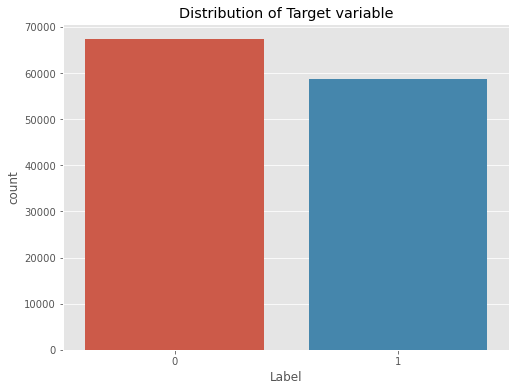

In [39]:
sns.countplot(Y)
plt.title('Distribution of Target variable')
plt.show()

The data is balanced.

### Exploratory Data Analysis

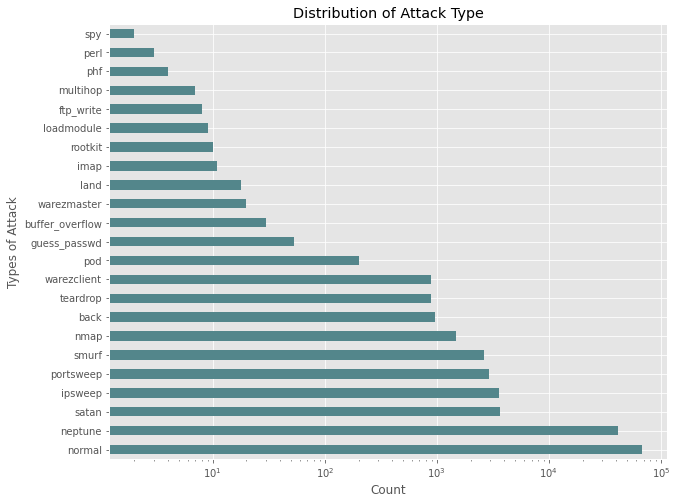

In [40]:
plt.figure(figsize = (10,8))
plt.xscale("log")
train.attack.value_counts().plot(kind='barh', color= '#53868b')
plt.xlabel('Count')
plt.ylabel('Types of Attack')
plt.title('Distribution of Attack Type')
plt.show()

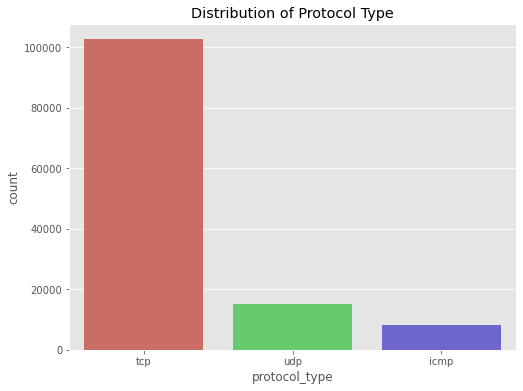

In [41]:
sns.countplot(train.protocol_type, palette='hls')
#plt.cmap('#8b3a62', '#53868b', '#8b864e')
plt.title('Distribution of Protocol Type')
plt.show()

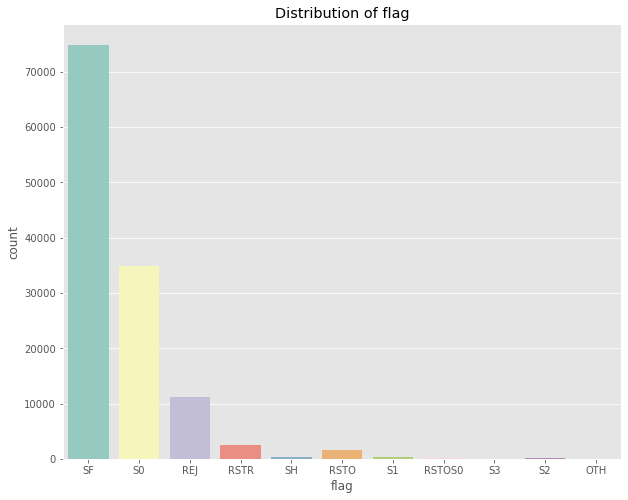

In [42]:
plt.figure(figsize = (10,8))
sns.countplot(train.flag,palette='Set3' )
plt.title('Distribution of flag')
plt.show()

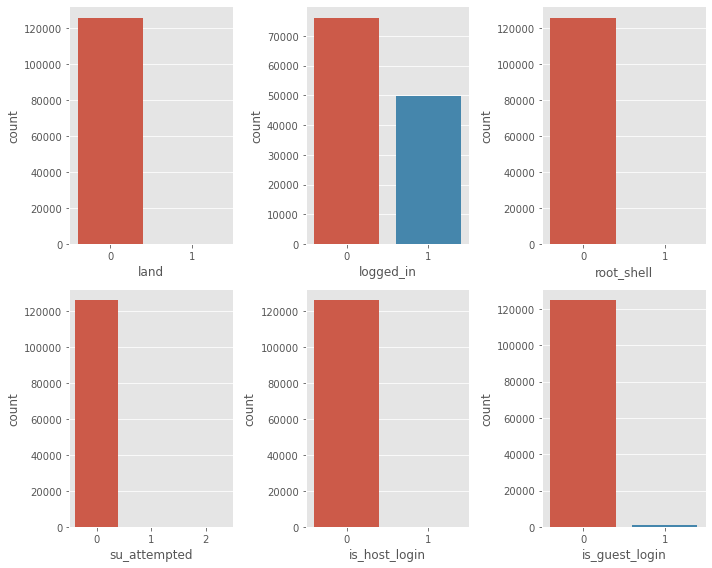

In [43]:
# Subplots showing Barplot for the binary categorical features:

fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize=(10, 8))

for i,j in zip(binary_vars, ax.flatten()):
    sns.countplot(train[i], ax=j)
    plt.tight_layout()

plt.show()

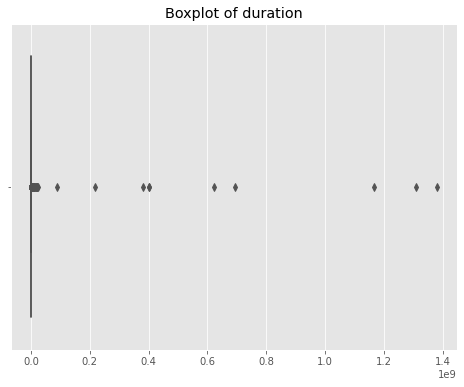

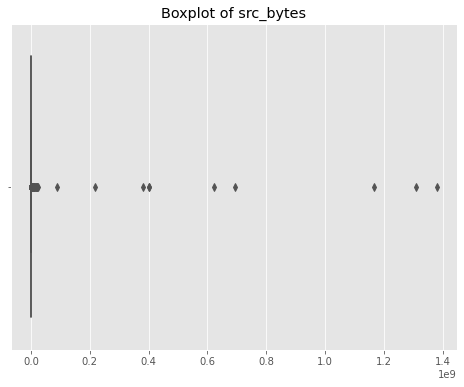

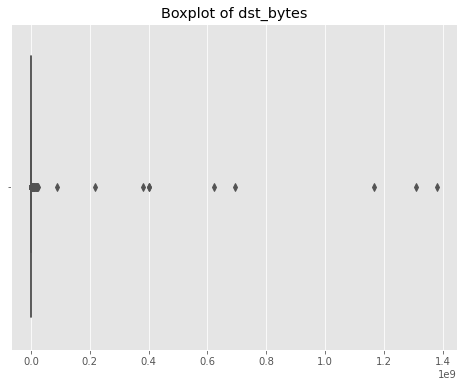

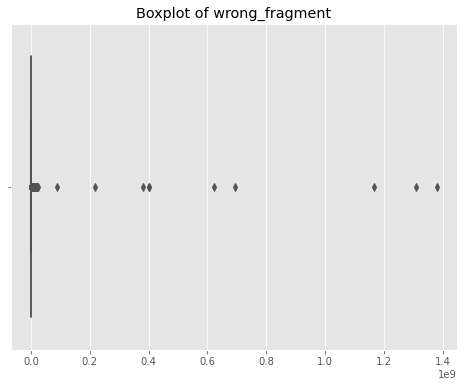

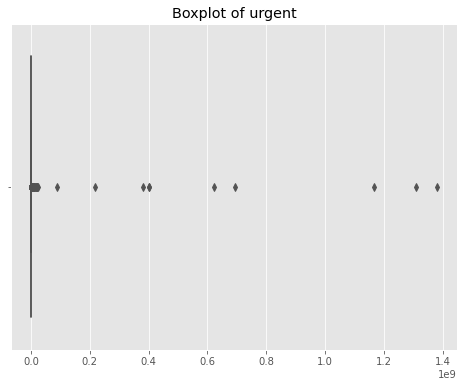

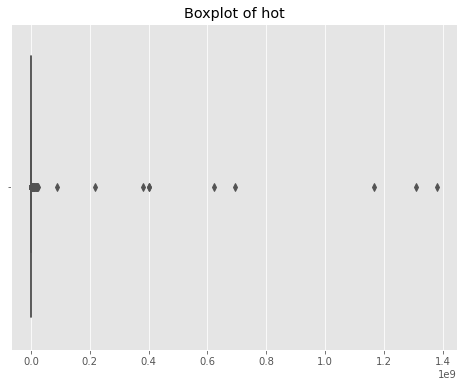

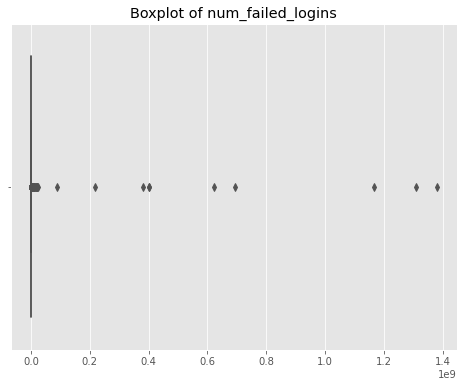

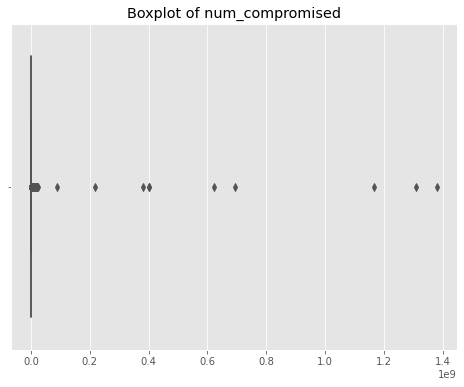

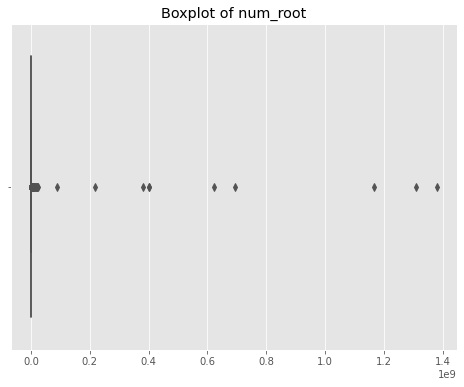

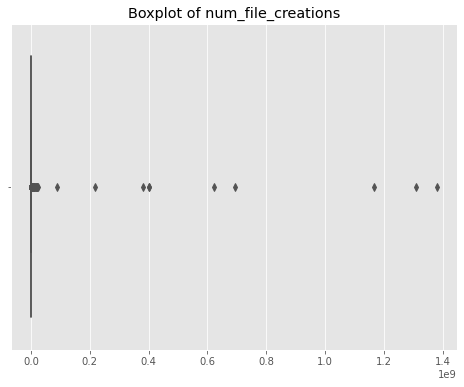

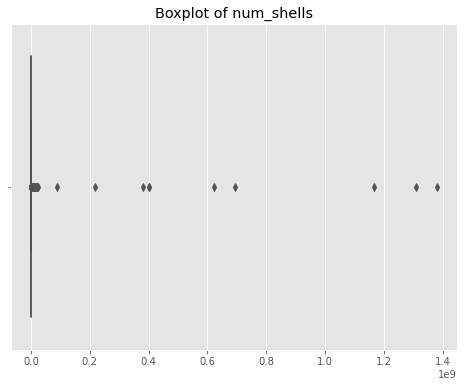

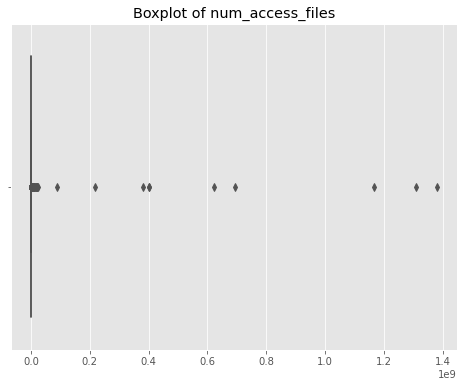

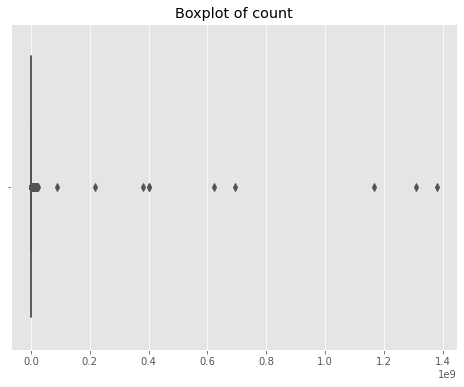

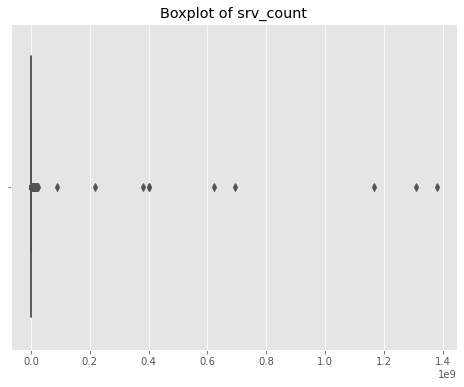

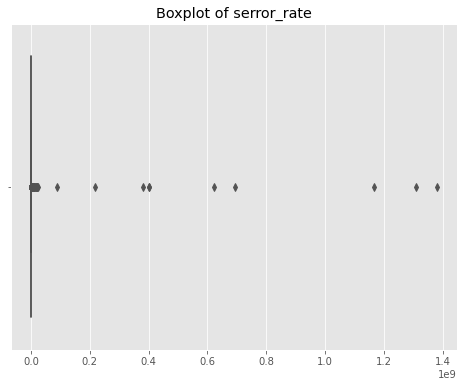

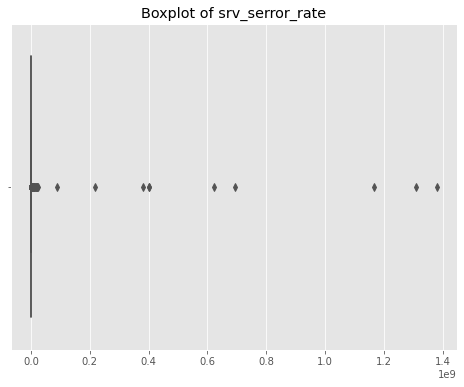

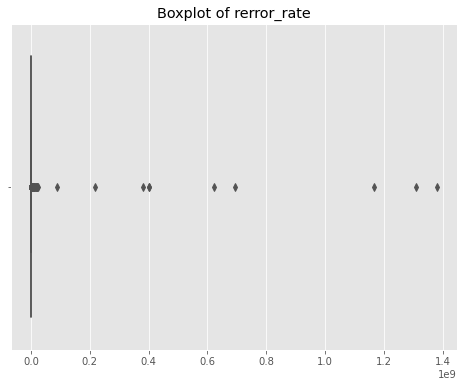

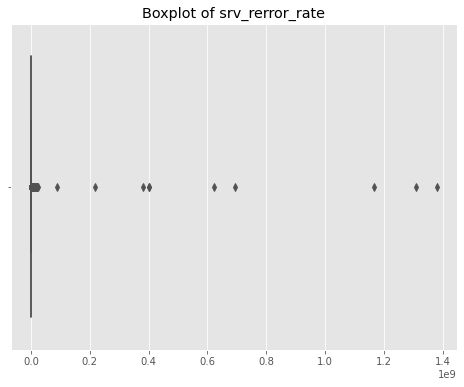

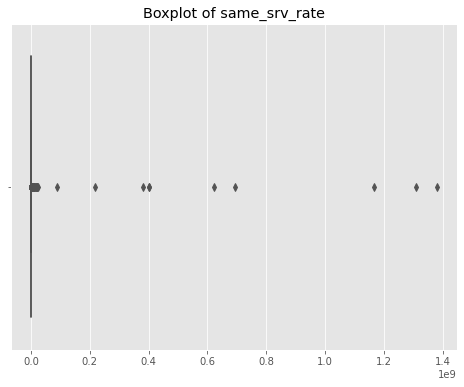

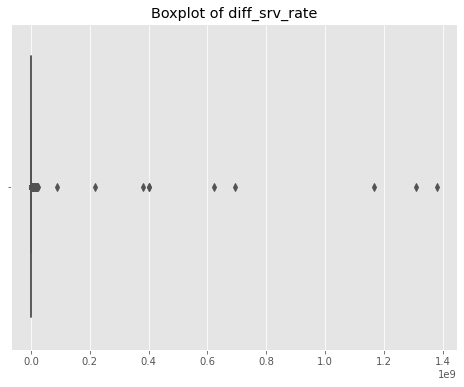

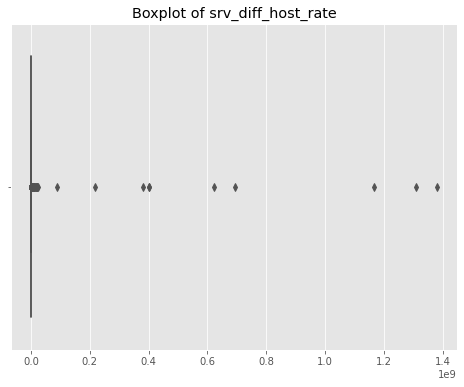

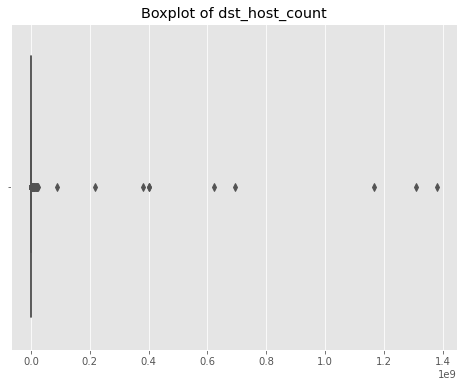

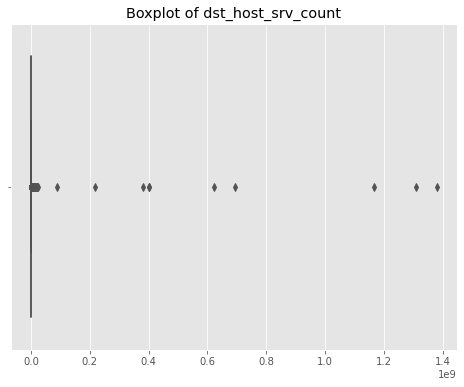

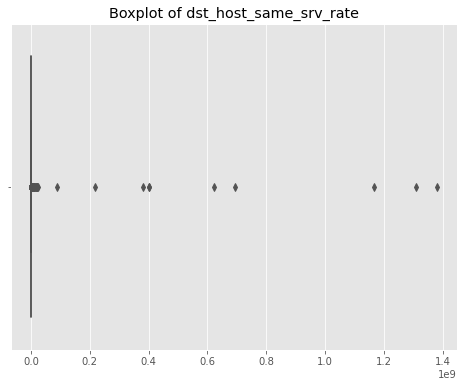

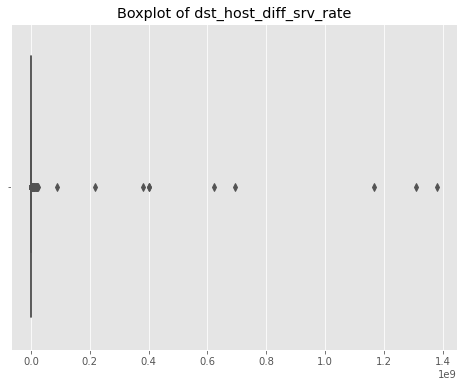

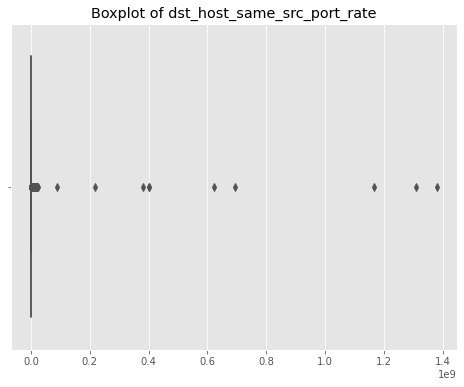

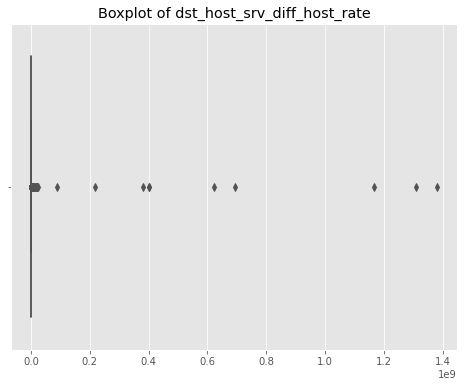

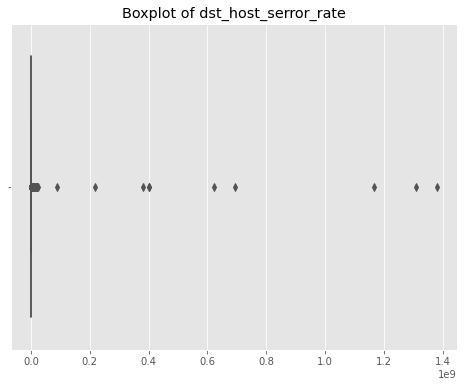

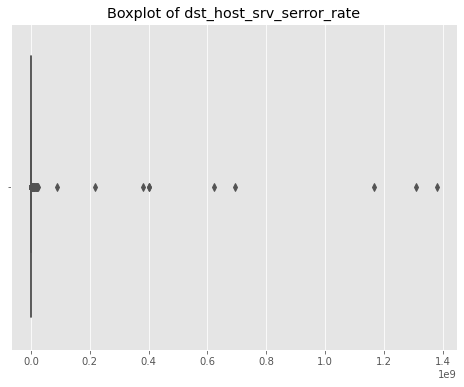

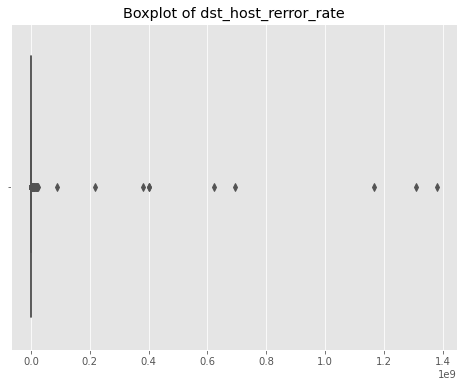

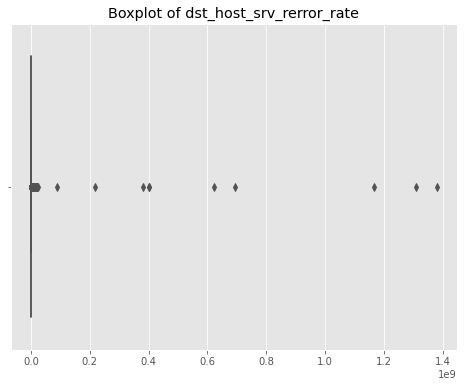

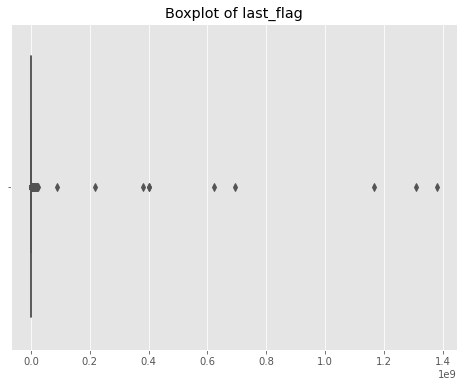

In [44]:
plt.rcParams['figure.figsize']=(8,6)
for i in num_features:
    sns.boxplot(train[num_features])
    plt.title('Boxplot of {}'.format(i))
    plt.show() 

The above boxplots shows the presence of outliers however, shall choose to leave these as the values are mostly between 0 and 1 can lead to wrong predictions if cap these outliers.

In [45]:
# Removing the attack variable from the train data:
train.drop(['attack'], inplace=True, axis=1)

In [46]:
# Pairplot to show the relationship between the target variable and features:
# sns.pairplot(train, hue='Label')
# plt.title('Pairplot')
#plt.show()

#### Identifying relationships (between Target variable & Numerical features by comparing means)

In [47]:
train.groupby(Y).mean()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Label
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,168.587396,13133.279331,4329.685223,0.000000,0.000148,0.230655,0.001381,0.507076,0.562924,0.022274,0.000609,0.007499,22.517945,27.685654,0.013441,0.012083,0.044196,0.044629,0.969360,0.028788,0.126263,147.431923,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698,20.31592,0.0
1,423.320689,82820.141327,37524.482159,0.048746,0.000068,0.174262,0.001040,0.017568,0.002712,0.001637,0.000188,0.000188,154.849991,27.797885,0.595808,0.593072,0.206980,0.209114,0.306659,0.102410,0.064079,222.025260,29.929081,0.187417,0.132131,0.178993,0.040062,0.595177,0.591329,0.201810,0.207008,18.57155,1.0


#### Scaling the numerical Features

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
SS = StandardScaler()

num_scaled = SS.fit_transform(train[num_features])

df_num_scaled = pd.DataFrame(num_scaled, columns = num_features).reset_index(drop=True)

#### Dummy Creation of the categorical Features

In [50]:
x_dummy  = pd.get_dummies(train[['protocol_type', 'service', 'flag']], drop_first = True)

x_dummy  = x_dummy.reset_index(drop=True)

In [51]:
x_binary = train[binary_features]

x_binary = x_binary.reset_index(drop=True)

In [52]:
#### Concatenating all the binary features, dummy and scaled dataset:

x_final = pd.concat([df_num_scaled, x_dummy, x_binary], axis=1)
x_final.shape

(125973, 119)

In [53]:
x_final.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,-0.110249,-0.007679,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.110249,-0.007737,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,-0.110249,-0.007728,-0.004814,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823,1,0,0,0,0,0,0,0

#### Applying the same preprocessing steps on the Test Data

In [54]:
# Creating Label for Test dataset:

test['Label'] = test.attack !='normal'
test['Label'] = test['Label'].apply(lambda x :int(x))

In [55]:
# Removing the attack variable from the test data:
test.drop(['attack'], inplace=True, axis=1)

In [56]:
# Y_test:

Y_test = test['Label']
Y_test.head()

0    1
1    1
2    0
3    1
4    1
Name: Label, dtype: int64

In [57]:
# Scaling the numerical variables:

SS = StandardScaler()

num_scaled_test = SS.fit_transform(test[num_features])

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = num_features).reset_index(drop=True)

In [58]:
# Creating dummy variables for the categorical variables:

x_dummy_test  = pd.get_dummies(test[['protocol_type', 'service', 'flag']], drop_first = True)

x_dummy_test  = x_dummy_test.reset_index(drop=True)

In [59]:
x_binary_test = test[binary_features]

x_binary_test = x_binary_test.reset_index(drop=True)

In [60]:
#### Concatenating all the binary features, dummy and scaled dataset:

x_final_test = pd.concat([df_num_scaled_test, x_dummy_test, x_binary_test], axis=1)
x_final_test.shape

(22544, 113)

In [61]:
 x_final_test.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,-0.155534,-0.021988,-0.096896,-0.059104,-0.019459,-0.113521,-0.143999,-0.016494,-0.014259,-0.012911,-0.02402,-0.052318,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0.698325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.155534,-0.021988,-0.096896,-0.059104,-0.019459,-0.113521,-0.143999,-0.016494,-0.014259,-0.012911,-0.02402,-0.052318,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0.698325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.154113,0.005473,-0.096896,-0.059104,-0.019459,-0.113521,-0.143999,-0.016494,-0.014259,-0.012911,-0.02402,-0.052318,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,0.698325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.155534,-0.021946,-0.096896,-0.059104,-0.019459,-0.113521,-0.143999,-0.016494,-0.014259,-0.012911,-0.02402,-0.052318,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,-0.706739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.154823,-0.021988,-0.096189,-0.059104,-0.019459,-0.113521,-0.143999,-0.016494,-0.014259,-0.012911,-0.02402,-0.052318,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,-1.643449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Adding the missing six service categories in the Test dataset 

In [62]:
# the missing categories were:
missing_service_cat

['urh_i', 'red_i', 'harvest', 'http_8001', 'aol', 'http_2784']

In [63]:
# Adding string services_ infront of each missing category:
string = 'service_'
missing_service_cat = [string + x for x in missing_service_cat]
missing_service_cat

['service_urh_i',
 'service_red_i',
 'service_harvest',
 'service_http_8001',
 'service_aol',
 'service_http_2784']

In [64]:
# Adding the missing categories column to the test data:
for col in missing_service_cat:
    x_final_test[col] = 0

x_final_test.shape

(22544, 119)

In [162]:
# check the dimensions of the train & test subset for 

print("The shape of X_train is:", x_final.shape)
print("The shape of X_test is:", x_final_test.shape)
print('')

print("The shape of Y_train is:",Y.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (125973, 119)
The shape of X_test is: (22544, 119)

The shape of Y_train is: (125973,)
The shape of Y_test is: (22544,)


In [65]:
# Importing Libraries:

from sklearn.linear_model import LogisticRegression

# importing classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

# Cross Validation, gridsearch
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,learning_curve, ShuffleSplit

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For to feature selection 
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif

# For faster processing
from sklearn.pipeline import Pipeline

### Building Model on All the features

In [66]:
# Logistic Regression
LR = LogisticRegression(n_jobs=-1, random_state = 0)
LR.fit(x_final, Y)
LR_pred = LR.predict(x_final_test)

# Decision Tree 
DT_full = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DT_full.fit(x_final, Y)
dt_pred = DT_full.predict(x_final_test)

# Random Forest
RF = RandomForestClassifier(n_estimators = 51, criterion = 'entropy', random_state = 0)
RF.fit(x_final, Y)
RF_pred = RF.predict(x_final_test)

# K-Nearest Neighbor
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors = 8)
knn.fit(x_final, Y)
knn_pred = knn.predict(x_final_test)

# Bernoulli Naive Bayes
NB = BernoulliNB()
NB.fit(x_final, Y)
NB_pred = NB.predict(x_final_test)

In [67]:
# Support Vector Machines
SVC = SVC(random_state=0)
SVC.fit(x_final, Y)
SVC_pred = SVC.predict(x_final_test)

In [68]:
# Ada Boost
AB = AdaBoostClassifier(n_estimators=51,random_state=0)
AB.fit(x_final, Y)
AB_pred = AB.predict(x_final_test)

# Gradient Boosting Boost
GB = GradientBoostingClassifier(n_estimators=100,random_state=0)
GB.fit(x_final, Y)
GB_pred = GB.predict(x_final_test)

In [111]:
## Train Ensemble Model 
combined_model = [('LogisticRegression', LR),
                  ('Decision Tree Classifier', DT_full),
                  ('RandomForest Classifier', RF),
                  ('K Nearest Neighbors', knn),
                  ('Naive Baye Classifier', NB),
                  ('Support Vector Machine', SVC),
                  ('Ada Boost', AB),
                  ('Gradient Boosting', GB)]

VC1 =  VotingClassifier(estimators = combined_model, voting = 'soft', n_jobs=-1)
VC2 =  VotingClassifier(estimators = combined_model, voting = 'hard', n_jobs=-1)

In [79]:
kf = KFold(n_splits = 10, shuffle = True, random_state=0)

Score_VC1 = cross_val_score(VC1, x_final, Y, cv=kf, scoring='roc_auc')

print('VC1',np.mean(Score_VC1),np.std(Score_VC1)/np.mean(Score_VC1))

VC1 0.999988528717498 1.3384436076813734e-05


In [76]:
kf = KFold(n_splits = 10, shuffle = True, random_state=0)

Score_VC1 = cross_val_score(VC1, x_final, Y, cv=kf, scoring='f1')
Score_VC2 = cross_val_score(VC2, x_final, Y, cv=kf, scoring='f1')

print('VC1',np.mean(Score_VC1),np.std(Score_VC1)/np.mean(Score_VC1))
print('VC2',np.mean(Score_VC2),np.std(Score_VC2)/np.mean(Score_VC2))

AttributeError: predict_proba is not available when voting='hard'

### Model Evaluation

In [81]:
print('================================= Model Evaluation of Logistic Regression ==============================')
print('')
accuracy_LR = accuracy_score(Y_test, LR_pred)
print('Accuracy Score of Logistic Tree:',accuracy_LR)
print('')

score_lr = roc_auc_score(Y_test, LR_pred)
print('ROC_AUC Score:',score_lr)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, LR_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, LR_pred))
print('')

================================= Model Evaluation of Logistic Regression ==============================

Accuracy Score of Logistic Tree: 0.7159776437189496

ROC_AUC Score: 0.7474446034141061

Confusion Matrix:
[[9465  246]
 [6157 6676]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.97      0.75      9711
           1       0.96      0.52      0.68     12833

    accuracy                           0.72     22544
   macro avg       0.79      0.75      0.71     22544
weighted avg       0.81      0.72      0.71     22544




In [82]:
print('================================= Model Evaluation of Decision Tree ==============================')
print('')
accuracy_dt = accuracy_score(Y_test,dt_pred)
print('Accuracy Score of Decision Tree:',accuracy_dt)
print('')

score_dt = roc_auc_score(Y_test, dt_pred)
print('ROC_AUC Score:',score_dt)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, dt_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, dt_pred))
print('')

================================= Model Evaluation of Decision Tree ==============================

Accuracy Score of Decision Tree: 0.7877927608232789

ROC_AUC Score: 0.7889168961479711

Confusion Matrix:
[[ 7740  1971]
 [ 2813 10020]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      9711
           1       0.84      0.78      0.81     12833

    accuracy                           0.79     22544
   macro avg       0.78      0.79      0.79     22544
weighted avg       0.79      0.79      0.79     22544




In [83]:
print('================================= Model Evaluation of Random Forest ==============================')
print('')
accuracy_RF = accuracy_score(Y_test, RF_pred)
print('Accuracy Score of Random Forest:',accuracy_RF)
print('')

score_RF = roc_auc_score(Y_test, RF_pred)
print('ROC_AUC Score:',score_RF)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, RF_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, RF_pred))
print('')

================================= Model Evaluation of Random Forest ==============================

Accuracy Score of Random Forest: 0.7281760113555713

ROC_AUC Score: 0.7471989591374948

Confusion Matrix:
[[8590 1121]
 [5007 7826]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.74      9711
           1       0.87      0.61      0.72     12833

    accuracy                           0.73     22544
   macro avg       0.75      0.75      0.73     22544
weighted avg       0.77      0.73      0.73     22544




In [84]:
print('================================= Model Evaluation of K-Nearest Neighbor ==============================')
print('')
accuracy_knn = accuracy_score(Y_test, knn_pred)
print('Accuracy Score of K-Nearest Neighbor:',accuracy_knn)
print('')

score_knn = roc_auc_score(Y_test, knn_pred)
print('ROC_AUC Score:',score_knn)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, knn_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, knn_pred))
print('')

================================= Model Evaluation of K-Nearest Neighbor ==============================

Accuracy Score of K-Nearest Neighbor: 0.774485450674237

ROC_AUC Score: 0.7989858600614567

Confusion Matrix:
[[9477  234]
 [4850 7983]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      9711
           1       0.97      0.62      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.82      0.80      0.77     22544
weighted avg       0.84      0.77      0.77     22544




In [85]:
print('================================= Model Evaluation of Naive Bayes ==============================')
accuracy_NB = accuracy_score(Y_test,NB_pred)
print('Accuracy Score of Naive Bayes:',accuracy_NB)
print('')

score_NB = roc_auc_score(Y_test, NB_pred)
print('ROC_AUC Score:',score_NB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, NB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, NB_pred))
print('')

================================= Model Evaluation of Naive Bayes ==============================
Accuracy Score of Naive Bayes: 0.818443931866572

ROC_AUC Score: 0.8155390505069748

Confusion Matrix:
[[ 7716  1995]
 [ 2098 10735]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      9711
           1       0.84      0.84      0.84     12833

    accuracy                           0.82     22544
   macro avg       0.81      0.82      0.82     22544
weighted avg       0.82      0.82      0.82     22544




In [112]:
print('================================= Model Evaluation of Support Vector Machine ==============================')
accuracy_SVC = accuracy_score(Y_test, SVC_pred)
print('Accuracy Score of Support Vector Machine:',accuracy_SVC)
print('')

score_SVC = roc_auc_score(Y_test, SVC_pred)
print('ROC_AUC Score:',score_SVC)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, SVC_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, SVC_pred))
print('')

================================= Model Evaluation of Support Vector Machine ==============================
Accuracy Score of Support Vector Machine: 0.7597143364088006

ROC_AUC Score: 0.7864624313749733

Confusion Matrix:
[[9513  198]
 [5219 7614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      9711
           1       0.97      0.59      0.74     12833

    accuracy                           0.76     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544




In [113]:
print('================================= Model Evaluation of Ada Boost ==============================')
accuracy_AB = accuracy_score(Y_test, AB_pred)
print('Accuracy Score of Ada Boost:',accuracy_AB)
print('')

score_AB = roc_auc_score(Y_test, AB_pred)
print('ROC_AUC Score:',score_AB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, AB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, AB_pred))
print('')

================================= Model Evaluation of Ada Boost ==============================
Accuracy Score of Ada Boost: 0.7540365507452094

ROC_AUC Score: 0.7730829007887683

Confusion Matrix:
[[8843  868]
 [4677 8156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      9711
           1       0.90      0.64      0.75     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544




In [87]:
print('================================= Model Evaluation of Gradient Boosting ==============================')
accuracy_GB = accuracy_score(Y_test, GB_pred)
print('Accuracy Score of Gradient Boosting:',accuracy_GB)
print('')

score_GB = roc_auc_score(Y_test, GB_pred)
print('ROC_AUC Score:', score_GB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, GB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, GB_pred))
print('')

================================= Model Evaluation of Gradient Boosting ==============================
Accuracy Score of Gradient Boosting: 0.7889904187366927

ROC_AUC Score: 0.7679357213704375

Confusion Matrix:
[[ 5981  3730]
 [ 1027 11806]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      9711
           1       0.76      0.92      0.83     12833

    accuracy                           0.79     22544
   macro avg       0.81      0.77      0.77     22544
weighted avg       0.80      0.79      0.78     22544




#### Combining all the Results

In [88]:
models = []
models.append(('Logistic Regression', LR))
models.append(('Decision Tree', DT_full))
models.append(('RandomForest', RF))
models.append(('K-Nearest Neighbor', knn))
models.append(('Naive Bayes', NB))
models.append(('Ada Boost', AB))
models.append(('Gradient Boosting', GB))
models.append(('VotingClassifier', VC1))

In [89]:
results = []
names = []
scoring = 'roc_auc'

for  name, model in models:
    kfold = KFold(n_splits = 10, random_state=0)
    cv_Results = cross_val_score(model, x_final, Y, cv = kfold, scoring = scoring)
    results.append(cv_Results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_Results), cv_Results.std())
    print(msg)

Logistic Regression: 0.998803 (0.000326)
Decision Tree: 0.998942 (0.000351)
RandomForest: 0.999999 (0.000001)
K-Nearest Neighbor: 0.999796 (0.000180)
Naive Bayes: 0.974972 (0.000713)
Ada Boost: 0.999741 (0.000087)
Gradient Boosting: 0.999971 (0.000016)
VotingClassifier: 0.999986 (0.000012)


In [115]:
# create dataframe 'metrics'

metrics_df = pd.DataFrame(columns=["Model_Name","Metric","Value","Features_used"])


In [116]:
LogisticRegression = pd.Series({'Model_Name': 'Logistic Regression',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_lr})

DecisionTree = pd.Series({'Model_Name': 'Decision Tree',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_dt})

RandomForest = pd.Series({'Model_Name': 'Random Forest',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_RF})

KNearestNeighbor = pd.Series({'Model_Name': 'K-Nearest Neighbor',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_knn})

NaiveBayes = pd.Series({'Model_Name': 'Naive Bayes',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_NB})

SupportVectorMachines = pd.Series({'Model_Name': 'Support Vector Machines',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_SVC})

AdaBoost = pd.Series({'Model_Name': 'Ada Boost',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_AB})

GradientBoosting = pd.Series({'Model_Name': 'Gradient Boosting',
                     'Features_used':'ALL',
                     'Metric': 'ROC_AUC',
                     'Value': score_GB})

In [117]:
# Appending all the results in the df:
metrics_df = metrics_df.append(LogisticRegression, ignore_index=True)
metrics_df = metrics_df.append(DecisionTree, ignore_index=True)
metrics_df = metrics_df.append(RandomForest, ignore_index=True)
metrics_df = metrics_df.append(KNearestNeighbor, ignore_index=True)
metrics_df = metrics_df.append(NaiveBayes, ignore_index=True)
metrics_df = metrics_df.append(SupportVectorMachines, ignore_index=True)
metrics_df = metrics_df.append(AdaBoost, ignore_index=True)
metrics_df = metrics_df.append(GradientBoosting, ignore_index=True)

In [118]:
metrics_df

,Model_Name,Metric,Value,Features_used
0,Logistic Regression,ROC_AUC,0.747445,ALL
1,Decision Tree,ROC_AUC,0.788917,ALL
2,Random Forest,ROC_AUC,0.747199,ALL
3,K-Nearest Neighbor,ROC_AUC,0.798986,ALL
4,Naive Bayes,ROC_AUC,0.815539,ALL
5,Support Vector Machines,ROC_AUC,0.786462,ALL
6,Ada Boost,ROC_AUC,0.773083,ALL
7,Gradient Boosting,ROC_AUC,0.767936,ALL


In [119]:
df_model = metrics_df[["Model_Name","Metric","Value","Features_used"]]
df_model.set_index(['Model_Name','Features_used','Metric'],drop=True,inplace=True)
df_model.unstack()
df_model.unstack().to_csv("Metrics.csv")
print('The Metrics for all the models are:')
df_model

The Metrics for all the models are:


,,,Value
Model_Name,Features_used,Metric,
Logistic Regression,ALL,ROC_AUC,0.747445
Decision Tree,ALL,ROC_AUC,0.788917
Random Forest,ALL,ROC_AUC,0.747199
K-Nearest Neighbor,ALL,ROC_AUC,0.798986
Naive Bayes,ALL,ROC_AUC,0.815539
Support Vector Machines,ALL,ROC_AUC,0.786462
Ada Boost,ALL,ROC_AUC,0.773083
Gradient Boosting,ALL,ROC_AUC,0.767936


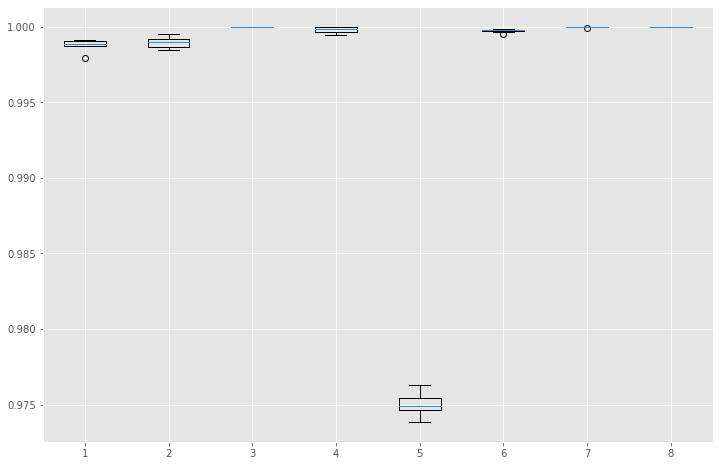

In [96]:
# BoxPlot algorithm comparison

plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####  Computing thresholds for ROC AUC Curve 

In case of Network Intrusion Dectection system, we have to reduce the false negatives that is we have to be careful that a network that is actually an attack is not predicted as safe. For this, we must aim for high Recall and Low Precision. Alos, we would plot the ROC curve and use Area Under Curve as an evaluation metric.

In [97]:
# Compute ROC curve and area the curve for logistic Regression:
probas_LR = LR.fit(x_final, Y).predict_proba(x_final_test)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(Y_test, probas_LR[:, 1])
roc_auc_LR= auc(fpr_LR, tpr_LR)
print("Area under the ROC curve for Logistic Regression is : %f" % roc_auc_LR)
                                                           
print('')
                                                           
# Compute ROC curve and area the curve for Decision Tree:
probas_DT = DT_full.fit(x_final, Y).predict_proba(x_final_test)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(Y_test, probas_DT[:, 1])
roc_auc_DT= auc(fpr_DT, tpr_DT)
print("Area under the ROC curve for Decision Tree is : %f" % roc_auc_DT) 

print('')

# Compute ROC curve and area the curve for Random Forest:
probas_RF = RF.fit(x_final, Y).predict_proba(x_final_test)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(Y_test, probas_RF[:, 1])
roc_auc_RF= auc(fpr_RF, tpr_RF)
print("Area under the ROC curve for Random Forest is : %f" % roc_auc_RF)   

print('')

# Compute ROC curve and area the curve for K-Nearest Neighbor:
probas_knn = knn.fit(x_final, Y).predict_proba(x_final_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, probas_knn[:, 1])
roc_auc_knn= auc(fpr_knn, tpr_knn)
print("Area under the ROC curve for K-Nearest Neighbor is : %f" % roc_auc_knn)
                                                           
print('')
                                                           
# Compute ROC curve and area the curve for Naive Bayes:
probas_NB = NB.fit(x_final, Y).predict_proba(x_final_test)
fpr_NB, tpr_NB, thresholds_NB = roc_curve(Y_test, probas_NB[:, 1])
roc_auc_NB= auc(fpr_NB, tpr_NB)
print("Area under the ROC curve for Naive Bayes is : %f" % roc_auc_NB) 

Area under the ROC curve for Logistic Regression is : 0.931372

Area under the ROC curve for Decision Tree is : 0.788917

Area under the ROC curve for Random Forest is : 0.855038

Area under the ROC curve for K-Nearest Neighbor is : 0.835787

Area under the ROC curve for Naive Bayes is : 0.904507


In [98]:
# Compute ROC curve and area the curve for AdaBoost:
probas_AB = AB.fit(x_final, Y).predict_proba(x_final_test)
fpr_AB, tpr_AB, thresholds_AB = roc_curve(Y_test, probas_AB[:, 1])
roc_auc_AB = auc(fpr_AB, tpr_AB)
print("Area under the ROC curve for Ada Boost is : %f" % roc_auc_AB)
                                                           
print('')
                                                           
# Compute ROC curve and area the curve for Gradient Boosting:
probas_GB = GB.fit(x_final, Y).predict_proba(x_final_test)
fpr_GB, tpr_GB, thresholds_GB = roc_curve(Y_test, probas_GB[:, 1])
roc_auc_GB= auc(fpr_GB, tpr_GB)
print("Area under the ROC curve for Gradient Boosting is : %f" % roc_auc_GB)                                                  

Area under the ROC curve for Ada Boost is : 0.908611

Area under the ROC curve for Gradient Boosting is : 0.877633


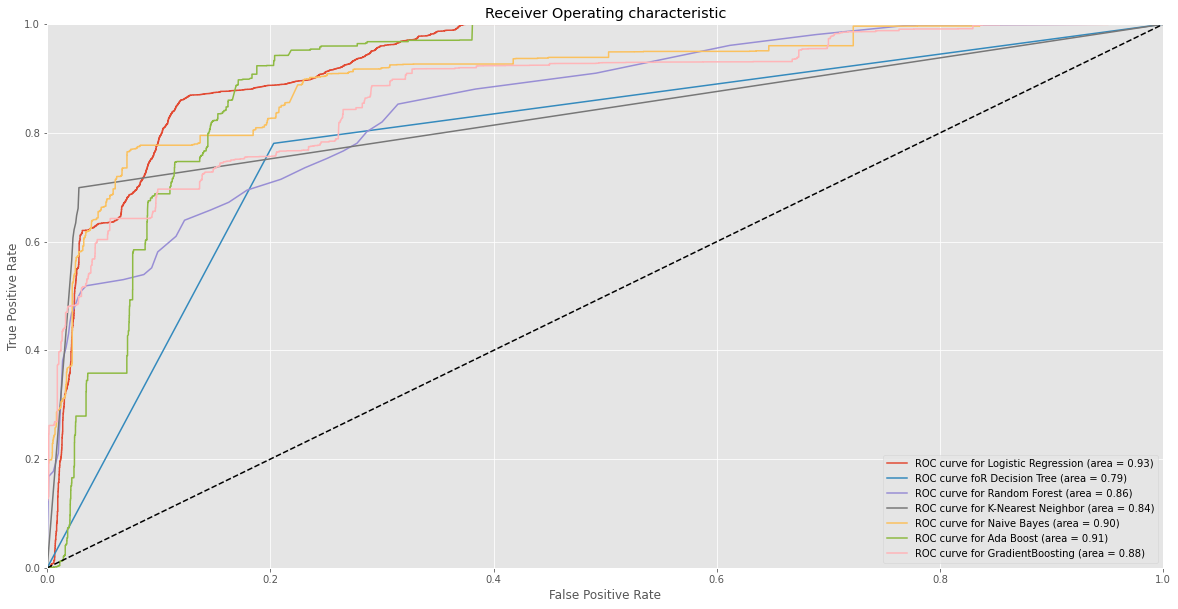

In [99]:
# Plot ROC curve
plt.figure(figsize=(20,10))
plt.clf()
plt.plot(fpr_LR, tpr_LR, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_DT, tpr_DT, label='ROC curve foR Decision Tree (area = %0.2f)' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_knn, tpr_knn, label='ROC curve for K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_NB, tpr_NB, label='ROC curve for Naive Bayes (area = %0.2f)' % roc_auc_NB)
plt.plot(fpr_AB, tpr_AB, label='ROC curve for Ada Boost (area = %0.2f)' % roc_auc_AB)
plt.plot(fpr_GB, tpr_GB, label='ROC curve for GradientBoosting (area = %0.2f)' % roc_auc_GB)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Feature Selection

Using the following variable reduction techniques:

- Recursive Feature Elimination (RFE)
- SelectKBest

#### Select KBest

In [100]:
SKB = SelectKBest(f_classif, k=15).fit(x_final, Y)

In [101]:
SKB.get_support()
imp_vars_SKB = list(x_final.columns[SKB.get_support()])
imp_vars_SKB

['count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'last_flag',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF',
 'logged_in']

#### Recursive Feature Elimination (RFE)

In [103]:
RF_classifier = RandomForestClassifier()
rfe = RFE(RF_classifier, 15)
rfe = rfe.fit(x_final, Y)

In [104]:
imp_vars_RFE = list(x_final.columns[rfe.support_])
imp_vars_RFE

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'last_flag',
 'service_ecr_i',
 'flag_SF',
 'logged_in']

#### Final List (from RFE, SelectKbest)

In [105]:
Final_list = list(set(imp_vars_SKB + imp_vars_RFE))
Final_list

['service_ecr_i',
 'serror_rate',
 'dst_bytes',
 'dst_host_srv_serror_rate',
 'last_flag',
 'service_private',
 'src_bytes',
 'srv_count',
 'srv_serror_rate',
 'count',
 'flag_S0',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'service_http',
 'logged_in',
 'dst_host_srv_count',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'flag_SF']

In [106]:
# Selecting the above features in both train and test dataset
x_new = x_final[Final_list]
x_new_test = x_final_test[Final_list]
x_new.head(2)
x_new_test.head(2)

,service_ecr_i,serror_rate,dst_bytes,dst_host_srv_serror_rate,last_flag,service_private,src_bytes,srv_count,srv_serror_rate,count,flag_S0,dst_host_diff_srv_rate,dst_host_same_src_port_rate,diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,service_http,logged_in,dst_host_srv_count,same_srv_rate,dst_host_count,dst_host_same_srv_rate,flag_SF
0,0,-0.348468,-0.096896,-0.35275,0.698325,1,-0.021988,-0.237191,-0.34739,1.166764,0,-0.13837,-0.431856,-0.131492,-0.22998,-0.358118,0,0,-1.169697,-1.697859,0.650093,-1.305370,0
1,0,-0.348468,-0.096896,-0.35275,0.698325,1,-0.021988,-0.338246,-0.34739,0.443234,0,-0.13837,-0.431856,-0.131492,-0.22998,-0.358118,0,0,-1.250212,-1.770589,0.650093,-1.397181,0


In [107]:
# checking the Dimensions of Train and Test:
print('x_train', x_new.shape)
print('y_train', Y.shape)
print('')
print('x_test', x_new_test.shape)
print('y_test', Y_test.shape)

x_train (125973, 23)
y_train (125973,)

x_test (22544, 23)
y_test (22544,)


### Building Model after Feature Selection

In [109]:
# Decision Tree 
DT_FS = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DT_FS.fit(x_new, Y)
DT_FS_pred = DT_FS.predict(x_new_test)

# Random Forest
RF_FS = RandomForestClassifier(n_estimators = 51, criterion = 'entropy', random_state = 0)
RF_FS.fit(x_new, Y)
RF_FS_pred = RF_FS.predict(x_new_test)

# K-Nearest Neighbor
knn_FS = KNeighborsClassifier(n_jobs=-1,n_neighbors = 8)
knn_FS.fit(x_new, Y)
knn_FS_pred = knn_FS.predict(x_new_test)

# Bernoulli Naive Bayes
NB_FS = BernoulliNB()
NB_FS.fit(x_new, Y)
NB_FS_pred = NB_FS.predict(x_new_test)

In [122]:
# Ada Boost
AB_FS = AdaBoostClassifier(n_estimators=51,random_state=0)
AB_FS.fit(x_new, Y)
AB_FS_pred = AB_FS.predict(x_new_test)

# Gradient Boosting Boost
GB_FS = GradientBoostingClassifier(n_estimators=100,random_state=0)
GB_FS.fit(x_new, Y)
GB_FS_pred = GB_FS.predict(x_new_test)

In [124]:
## Train Ensemble Model 
combined_model_1 = [('Decision Tree Classifier', DT_FS),
                  ('RandomForest Classifier', RF_FS),
                  ('K Nearest Neighbors', knn_FS),
                  ('Naive Baye Classifier', NB_FS),
                  ('Ada Boost', AB_FS),
                  ('Gradient Boosting', GB_FS)]

VC1_FS =  VotingClassifier(estimators = combined_model_1, voting = 'soft', n_jobs=-1)
VC2_FS =  VotingClassifier(estimators = combined_model_1, voting = 'hard', n_jobs=-1)

### Model Evaluation on Feature Selected model

In [126]:
print('================================= Model Evaluation of Decision Tree ==============================')
print('')
accuracy_dt_FS = accuracy_score(Y_test, DT_FS_pred)
print('Accuracy Score of Decision Tree:',accuracy_dt_FS)
print('')

score_dt_FS = roc_auc_score(Y_test, DT_FS_pred)
print('ROC_AUC Score:',score_dt_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, DT_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, DT_FS_pred))
print('')

================================= Model Evaluation of Decision Tree ==============================

Accuracy Score of Decision Tree: 0.8048261178140526

ROC_AUC Score: 0.8150389472461053

Confusion Matrix:
[[8631 1080]
 [3320 9513]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      9711
           1       0.90      0.74      0.81     12833

    accuracy                           0.80     22544
   macro avg       0.81      0.82      0.80     22544
weighted avg       0.82      0.80      0.81     22544




In [127]:
print('================================= Model Evaluation of Random Forest ==============================')
print('')
accuracy_RF_FS = accuracy_score(Y_test, RF_FS_pred)
print('Accuracy Score of Random Forest:',accuracy_RF_FS)
print('')

score_RF_FS = roc_auc_score(Y_test, RF_FS_pred)
print('ROC_AUC Score:',score_RF_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, RF_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, RF_FS_pred))
print('')

================================= Model Evaluation of Random Forest ==============================

Accuracy Score of Random Forest: 0.7845102909865153

ROC_AUC Score: 0.7998623557522443

Confusion Matrix:
[[8844  867]
 [3991 8842]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78      9711
           1       0.91      0.69      0.78     12833

    accuracy                           0.78     22544
   macro avg       0.80      0.80      0.78     22544
weighted avg       0.82      0.78      0.78     22544




In [128]:
print('================================= Model Evaluation of K-Nearest Neighbor ==============================')
print('')
accuracy_knn_FS = accuracy_score(Y_test, knn_FS_pred)
print('Accuracy Score of K-Nearest Neighbor:',accuracy_knn_FS)
print('')

score_knn_FS = roc_auc_score(Y_test, knn_FS_pred)
print('ROC_AUC Score:',score_knn_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, knn_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, knn_FS_pred))
print('')

================================= Model Evaluation of K-Nearest Neighbor ==============================

Accuracy Score of K-Nearest Neighbor: 0.7898775727466288

ROC_AUC Score: 0.8127186329350554

Confusion Matrix:
[[9494  217]
 [4520 8313]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.98      0.80      9711
           1       0.97      0.65      0.78     12833

    accuracy                           0.79     22544
   macro avg       0.83      0.81      0.79     22544
weighted avg       0.85      0.79      0.79     22544




In [129]:
print('================================= Model Evaluation of Naive Bayes ==============================')
accuracy_NB_FS = accuracy_score(Y_test,NB_FS_pred)
print('Accuracy Score of Naive Bayes:',accuracy_NB_FS)
print('')

score_NB_FS = roc_auc_score(Y_test, NB_FS_pred)
print('ROC_AUC Score:',score_NB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, NB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, NB_FS_pred))
print('')

================================= Model Evaluation of Naive Bayes ==============================
Accuracy Score of Naive Bayes: 0.7650372604684174

ROC_AUC Score: 0.7901859051131588

Confusion Matrix:
[[9437  274]
 [5023 7810]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.97      0.61      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.77      0.76     22544




In [130]:
print('================================= Model Evaluation of Ada Boost ==============================')
accuracy_AB_FS = accuracy_score(Y_test, AB_FS_pred)
print('Accuracy Score of Ada Boost:',accuracy_AB_FS)
print('')

score_AB_FS = roc_auc_score(Y_test, AB_FS_pred)
print('ROC_AUC Score:',score_AB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, AB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, AB_FS_pred))
print('')

================================= Model Evaluation of Ada Boost ==============================
Accuracy Score of Ada Boost: 0.7732877927608233

ROC_AUC Score: 0.7903556835240869

Confusion Matrix:
[[8872  839]
 [4272 8561]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.78      9711
           1       0.91      0.67      0.77     12833

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.77     22544




In [131]:
print('================================= Model Evaluation of Gradient Boosting ==============================')
accuracy_FS_GB = accuracy_score(Y_test, GB_FS_pred)
print('Accuracy Score of Gradient Boosting:',accuracy_FS_GB)
print('')

score_FS_GB = roc_auc_score(Y_test, GB_FS_pred)
print('ROC_AUC Score:', score_FS_GB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, GB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, GB_FS_pred))
print('')

================================= Model Evaluation of Gradient Boosting ==============================
Accuracy Score of Gradient Boosting: 0.8285131298793471

ROC_AUC Score: 0.8169430203897067

Confusion Matrix:
[[ 7122  2589]
 [ 1277 11556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      9711
           1       0.82      0.90      0.86     12833

    accuracy                           0.83     22544
   macro avg       0.83      0.82      0.82     22544
weighted avg       0.83      0.83      0.83     22544




In [137]:
models2 = []
models2.append(('Decision Tree', DT_FS))
models2.append(('RandomForest', RF_FS))
models2.append(('K-Nearest Neighbor', knn_FS))
models2.append(('Naive Bayes', NB_FS))
models2.append(('Ada Boost', AB_FS))
models2.append(('Gradient Boosting', GB_FS))
models2.append(('VotingClassifier', VC1_FS))

In [138]:
results2 = []
names2 = []
scoring = 'roc_auc'

for  name2, model in models2:
    kfold = KFold(n_splits = 10, random_state=2)
    cv_Results = cross_val_score(model, x_final, Y, cv = kfold, scoring = scoring)
    results2.append(cv_Results)
    names2.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_Results), cv_Results.std())
    print(msg)

VotingClassifier: 0.998942 (0.000351)
VotingClassifier: 0.999999 (0.000001)
VotingClassifier: 0.999796 (0.000180)
VotingClassifier: 0.974972 (0.000713)
VotingClassifier: 0.999741 (0.000087)
VotingClassifier: 0.999971 (0.000016)


In [159]:
models3 = []
models3.append(('Decision Tree', DT_FS))
models3.append(('RandomForest', RF_FS))
models3.append(('K-Nearest Neighbor', knn_FS))
models3.append(('Naive Bayes', NB_FS))
models3.append(('Ada Boost', AB_FS))
models3.append(('Gradient Boosting', GB_FS))

In [161]:
results3 = []
names3 = []
scoring = 'roc_auc'

for  name3, model in models3:
    kfold2 = KFold(n_splits = 10, random_state = 0)
    cv_Results = cross_val_score(model, x_new, Y, cv = kfold2, scoring = scoring)
    results3.append(cv_Results)
    names3.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_Results), cv_Results.std())
    print(msg)

VotingClassifier: 0.998832 (0.000489)
VotingClassifier: 0.999998 (0.000001)
VotingClassifier: 0.999659 (0.000175)
VotingClassifier: 0.961925 (0.001233)
VotingClassifier: 0.999538 (0.000110)
VotingClassifier: 0.999964 (0.000016)


In [133]:
# create dataframe 'metrics'


metrics_df_2 = pd.DataFrame(columns=["Model_Name","Metric","Value","Features_used"])


In [140]:
DecisionTree2 = pd.Series({'Model_Name': 'Decision Tree',
                     'Features_used':'RFE and SelectKBest',
                     'Metric': 'ROC_AUC',
                     'Value': score_dt_FS})

RandomForest2 = pd.Series({'Model_Name': 'Random Forest',
                     'Features_used':'RFE and SelectKBest',
                     'Metric': 'ROC_AUC',
                     'Value': score_RF_FS})

KNearestNeighbor2 = pd.Series({'Model_Name': 'K-Nearest Neighbor',
                     'Features_used':'RFE and SelectKBest',
                     'Metric': 'ROC_AUC',
                     'Value': score_knn_FS})

NaiveBayes2 = pd.Series({'Model_Name': 'Naive Bayes',
                     'Features_used':'RFE and SelectKBest',
                     'Metric': 'ROC_AUC',
                     'Value': score_NB_FS})

AdaBoost2 = pd.Series({'Model_Name': 'Ada Boost',
                     'Features_used':'RFE and SelectKBest',
                     'Metric': 'ROC_AUC',
                     'Value': score_AB_FS})

GradientBoosting2 = pd.Series({'Model_Name': 'Gradient Boosting',
                     'Features_used':'RFE and SelectKBest',
                     'Metric': 'ROC_AUC',
                     'Value': score_FS_GB})


In [142]:
# Appending all the results in the df:
metrics_df_2 = metrics_df_2.append(DecisionTree2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(RandomForest2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(KNearestNeighbor2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(NaiveBayes2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(AdaBoost2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(GradientBoosting2, ignore_index=True)

In [143]:
metrics_df_2

,Model_Name,Metric,Value,Features_used
0,Decision Tree,ROC_AUC,0.815039,RFE and SelectKBest
1,Random Forest,ROC_AUC,0.799862,RFE and SelectKBest
2,K-Nearest Neighbor,ROC_AUC,0.812719,RFE and SelectKBest
3,Naive Bayes,ROC_AUC,0.790186,RFE and SelectKBest
4,Ada Boost,ROC_AUC,0.790356,RFE and SelectKBest
5,Gradient Boosting,ROC_AUC,0.816943,RFE and SelectKBest


In [145]:
df_model_2 = metrics_df_2[["Model_Name","Metric","Value","Features_used"]]
df_model_2.set_index(['Model_Name','Features_used','Metric'],drop=True,inplace=True)
df_model_2.unstack()
df_model_2.unstack().to_csv("Metrics.csv")
print('The Metrics for all the models are:')
df_model_2

The Metrics for all the models are:


,,,Value
Model_Name,Features_used,Metric,
Decision Tree,RFE and SelectKBest,ROC_AUC,0.815039
Random Forest,RFE and SelectKBest,ROC_AUC,0.799862
K-Nearest Neighbor,RFE and SelectKBest,ROC_AUC,0.812719
Naive Bayes,RFE and SelectKBest,ROC_AUC,0.790186
Ada Boost,RFE and SelectKBest,ROC_AUC,0.790356
Gradient Boosting,RFE and SelectKBest,ROC_AUC,0.816943


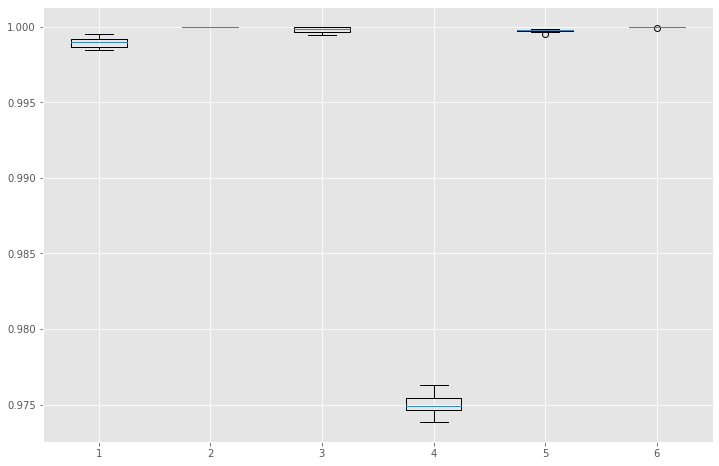

In [146]:
# BoxPlot algorithm comparison

plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

#### Computation of thresholds for ROC AUC Curve 

In [148]:
# Compute ROC curve and area the curve for Decision Tree:
probas_DT_FS = DT_FS.fit(x_new, Y).predict_proba(x_new_test)
fpr_DT_FS, tpr_DT_FS, thresholds_DT_FS = roc_curve(Y_test, probas_DT_FS[:, 1])
roc_auc_DT_FS = auc(fpr_DT_FS, tpr_DT_FS)
print("Area under the ROC curve for Decision Tree is : %f" % roc_auc_DT_FS) 

print('')

# Compute ROC curve and area the curve for Random Forest:
probas_RF_FS = RF_FS.fit(x_new, Y).predict_proba(x_new_test)
fpr_RF_FS, tpr_RF_FS, thresholds_RF_FS = roc_curve(Y_test, probas_RF_FS[:, 1])
roc_auc_RF_FS = auc(fpr_RF_FS, tpr_RF_FS)
print("Area under the ROC curve for Random Forest is : %f" % roc_auc_RF)   

print('')

# Compute ROC curve and area the curve for K-Nearest Neighbor:
probas_knn_FS = knn_FS.fit(x_new, Y).predict_proba(x_new_test)
fpr_knn_FS, tpr_knn_FS, thresholds_knn_FS = roc_curve(Y_test, probas_knn_FS[:, 1])
roc_auc_knn_FS = auc(fpr_knn_FS, tpr_knn_FS)
print("Area under the ROC curve for K-Nearest Neighbor is : %f" % roc_auc_knn_FS)
                                                           
print('')
                                                           
# Compute ROC curve and area the curve for Naive Bayes:
probas_NB_FS = NB_FS.fit(x_new, Y).predict_proba(x_new_test)
fpr_NB_FS, tpr_NB_FS, thresholds_NB_FS = roc_curve(Y_test, probas_NB_FS[:, 1])
roc_auc_NB_FS = auc(fpr_NB_FS, tpr_NB_FS)
print("Area under the ROC curve for Naive Bayes is : %f" % roc_auc_NB_FS) 

Area under the ROC curve for Decision Tree is : 0.815039

Area under the ROC curve for Random Forest is : 0.855038

Area under the ROC curve for K-Nearest Neighbor is : 0.845636

Area under the ROC curve for Naive Bayes is : 0.920317


In [149]:
# Compute ROC curve and area the curve for AdaBoost:
probas_AB_FS = AB_FS.fit(x_new, Y).predict_proba(x_new_test)
fpr_AB_FS, tpr_AB_FS, thresholds_AB = roc_curve(Y_test, probas_AB[:, 1])
roc_auc_AB_FS = auc(fpr_AB, tpr_AB)
print("Area under the ROC curve for Ada Boost is : %f" % roc_auc_AB)
                                                           
print('')
                                                           
# Compute ROC curve and area the curve for Gradient Boosting:
probas_GB_FS = GB_FS.fit(x_new, Y).predict_proba(x_new_test)
fpr_GB_FS, tpr_GB_FS, thresholds_GB_FS = roc_curve(Y_test, probas_GB_FS[:, 1])
roc_auc_GB_FS = auc(fpr_GB_FS, tpr_GB_FS)
print("Area under the ROC curve for Gradient Boosting is : %f" % roc_auc_GB_FS)                                                  

Area under the ROC curve for Ada Boost is : 0.908611

Area under the ROC curve for Gradient Boosting is : 0.879427


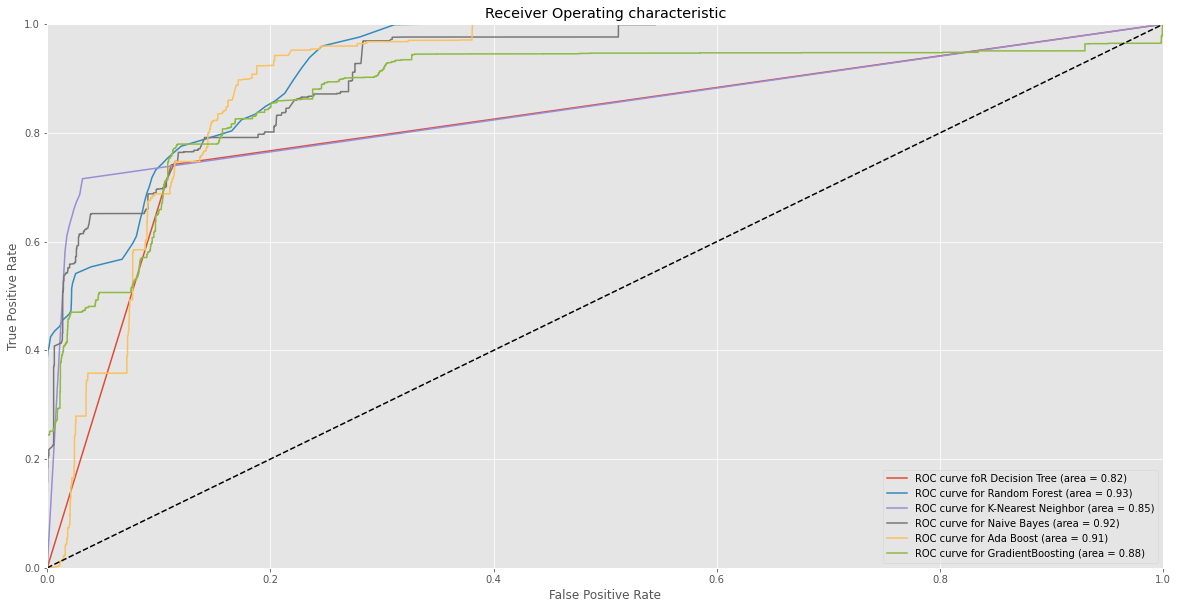

In [150]:
# Plot ROC curve
plt.figure(figsize=(20,10))
plt.clf()
plt.plot(fpr_DT_FS, tpr_DT_FS, label='ROC curve foR Decision Tree (area = %0.2f)' % roc_auc_DT_FS)
plt.plot(fpr_RF_FS, tpr_RF_FS, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc_RF_FS)
plt.plot(fpr_knn_FS, tpr_knn_FS, label='ROC curve for K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn_FS)
plt.plot(fpr_NB_FS, tpr_NB_FS, label='ROC curve for Naive Bayes (area = %0.2f)' % roc_auc_NB_FS)
plt.plot(fpr_AB_FS, tpr_AB_FS, label='ROC curve for Ada Boost (area = %0.2f)' % roc_auc_AB_FS)
plt.plot(fpr_GB_FS, tpr_GB_FS, label='ROC curve for GradientBoosting (area = %0.2f)' % roc_auc_GB_FS)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [151]:
# Comparison of Models with All Features used vs with Subset of Features from RFE and SelectKBest

# All Features set:
df_model

,,,Value
Model_Name,Features_used,Metric,
Logistic Regression,ALL,ROC_AUC,0.747445
Decision Tree,ALL,ROC_AUC,0.788917
Random Forest,ALL,ROC_AUC,0.747199
K-Nearest Neighbor,ALL,ROC_AUC,0.798986
Naive Bayes,ALL,ROC_AUC,0.815539
Support Vector Machines,ALL,ROC_AUC,0.786462
Ada Boost,ALL,ROC_AUC,0.773083
Gradient Boosting,ALL,ROC_AUC,0.767936


In [152]:
# Subset Features used:
df_model_2

,,,Value
Model_Name,Features_used,Metric,
Decision Tree,RFE and SelectKBest,ROC_AUC,0.815039
Random Forest,RFE and SelectKBest,ROC_AUC,0.799862
K-Nearest Neighbor,RFE and SelectKBest,ROC_AUC,0.812719
Naive Bayes,RFE and SelectKBest,ROC_AUC,0.790186
Ada Boost,RFE and SelectKBest,ROC_AUC,0.790356
Gradient Boosting,RFE and SelectKBest,ROC_AUC,0.816943


In [153]:
df_model.merge(df_model_2, on='Model_Name', how='left')

,Value_x,Value_y
Model_Name,,
Logistic Regression,0.747445,NaN
Decision Tree,0.788917,0.815039
Random Forest,0.747199,0.799862
K-Nearest Neighbor,0.798986,0.812719
Naive Bayes,0.815539,0.790186
Support Vector Machines,0.786462,NaN
Ada Boost,0.773083,0.790356
Gradient Boosting,0.767936,0.816943


---------------------------